1. Considere o conjunto de dados disponível em boston.csv, organizado em 14 colunas, sendo as 13 primeiras colunas os atributos e a  ́ultima coluna a saída. Os 13 atributos são usados na predição de preços de casas em Boston na década de 1970. Maiores detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset.

(a) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%)<br>
(b) Treine 11 modelos de regress ̃ao polinomial, com ordens de 1 a 11.<br>
(c) Reporte o RMSE (raiz quadrada do erro quadr ́atico m ́edio) no treinamento e no teste para<br>
cada modelo. Fa ̧ca um gr ́afico para o treino e um gr ́afico para o teste.<br>
(d) Repita os 2 itens anteriores incluindo um termo de regulariza ̧c ̃ao L2 com fator λ = 0.01.<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importação dos dados

In [3]:
data = pd.read_csv('boston.csv')

### (A) Divisão aleatória dos dados
Pelo que eu entendi, é para separar os dados em dados de teste e de treinamento.

In [4]:
train_data = data.sample(frac=0.8) # Separa aleatoriamente 80% dos dados para treinamento
test_data = data.drop(train_data.index) # Separa o resto dos dados para teste (20%).

# Verificar o tamanho dos conjuntos...
print("Tamanho do conjunto de treino:", len(train_data))
print("Tamanho do conjunto de teste:", len(test_data))

Tamanho do conjunto de treino: 404
Tamanho do conjunto de teste: 101


### (B) Treine 11 modelos de regress ̃ao polinomial, com ordens de 1 a 11.
Para este item, iremos separar os dados da seguinte forma, as n-1 colunas serão nossos X e a última será nosso Y (foi assim que entendi).

In [5]:
# Separando as entradas (X) e a saída (y).
X_train = train_data.iloc[:, :-1].values # Todas as colunas menos a última.
y_train = train_data.iloc[:, -1].values # Última coluna (preço).

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

print(data.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(505, 14)
(404, 13)
(404,)
(101, 13)
(101,)


In [6]:
# Gerador de termos polonomiais
def generate_polynomial_features(X, degree):
    """Gera os termos polinomiais até o grau especificado"""
    X_poly = np.ones((X.shape[0], 1)) # Colun de 1s
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X**d))  # Adiciona colunas de x^d

    return X_poly

Modelo de grau 1:
 - Coeficientes: [ 3.86880789e+01 -1.08567630e-01  4.67869470e-02  2.11998938e-03
  2.09426113e+00 -1.85139942e+01  3.82119830e+00 -2.47345896e-03
 -1.49691805e+00  3.08776038e-01 -1.20594650e-02 -1.03632402e+00
  8.48649835e-03 -4.93510450e-01]
 - Erro de treino (MSE): 22.4034
 - Erro de teste (MSE): 20.1268

Modelo de grau 2:
 - Coeficientes: [ 1.66390845e+02 -3.82133749e-01 -7.42022804e-02 -2.50260226e-01
  1.18563062e+00 -1.71423445e+01 -2.00887437e+01 -2.96380481e-02
 -2.52234958e+00  6.56336807e-01 -1.51726142e-02 -5.59018475e+00
  1.83623769e-02 -1.32225795e+00  3.07197915e-03  9.00988262e-04
  1.03370182e-02  1.18563127e+00 -5.40087595e+00  1.77799744e+00
  2.52944129e-04  1.34115595e-01 -6.98661460e-03 -1.49851066e-07
  1.33405830e-01 -2.83010674e-05  2.23493518e-02]
 - Erro de treino (MSE): 14.7074
 - Erro de teste (MSE): 12.9266

Modelo de grau 3:
 - Coeficientes: [ 1.26281610e+02 -6.91259813e-01  3.82428990e-02 -3.84479561e-01
  7.35528492e-01  3.32095280e

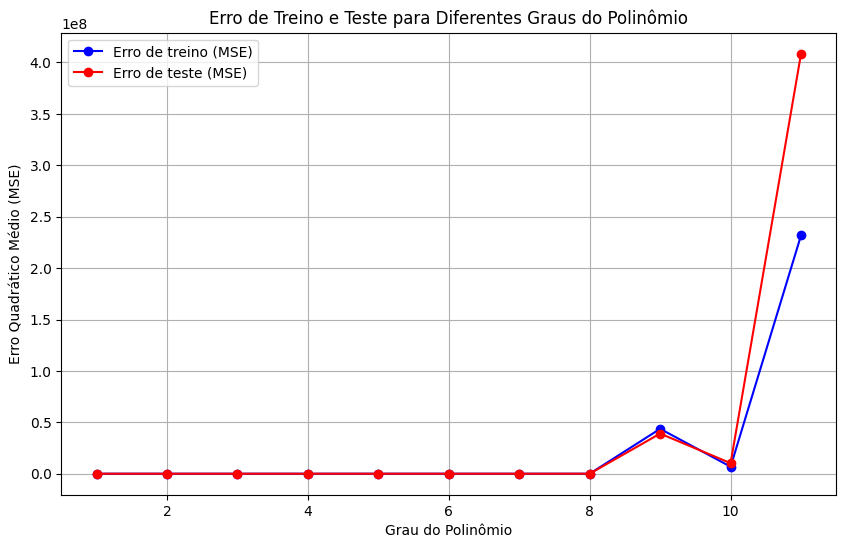

In [7]:
models = []
mse_train = []
mse_test = []

# Definir o valor de lambda para regularização
lambda_L2= 1e-3

# Loop para graus de 1 a 11
for degree in range(1, 12):
    # Gerar os termos polinomiais
    X_poly_train = generate_polynomial_features(X_train, degree)
    X_poly_test = generate_polynomial_features(X_test, degree)
    
    # Regularização L2 para calcular os coeficientes
    # X_poly.T @ X_poly + lambda * I
    I = np.identity(X_poly_train.shape[1])  # Matriz identidade do mesmo tamanho de X_poly.T @ X_poly
    w = np.linalg.inv(X_poly_train.T @ X_poly_train + lambda_L2 * I) @ X_poly_train.T @ y_train
    
    # Previsão nos conjuntos de treino e teste
    y_train_pred = X_poly_train @ w
    y_test_pred = X_poly_test @ w
    
    # Calcular o MSE
    mse_train.append(np.mean((y_train - y_train_pred) ** 2))
    mse_test.append(np.mean((y_test - y_test_pred) ** 2))
    
    # Armazenar o modelo (os coeficientes)
    models.append(w)
    
    # Imprimir os resultados para o modelo atual
    print(f"Modelo de grau {degree}:")
    print(f" - Coeficientes: {w}")
    print(f" - Erro de treino (MSE): {mse_train[-1]:.4f}")
    print(f" - Erro de teste (MSE): {mse_test[-1]:.4f}")
    print()

# Visualização do MSE de treino e teste
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), mse_train, label='Erro de treino (MSE)', marker='o', color='blue')
plt.plot(range(1, 12), mse_test, label='Erro de teste (MSE)', marker='o', color='red')
plt.xlabel('Grau do Polinômio')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Erro de Treino e Teste para Diferentes Graus do Polinômio')
plt.legend()
plt.grid(True)
plt.show()


### (C) Reporte o RMSE (raiz quadrada do erro quadr ́atico m ́edio) no treinamento e no teste para cada modelo. Faça um gráfico para o treino e um gr ́afico para o teste.

Modelo de grau 1:
 - RMSE de treino: 4.7332
 - RMSE de teste: 4.4863

Modelo de grau 2:
 - RMSE de treino: 3.8350
 - RMSE de teste: 3.5954

Modelo de grau 3:
 - RMSE de treino: 3.7230
 - RMSE de teste: 3.4298

Modelo de grau 4:
 - RMSE de treino: 3.4964
 - RMSE de teste: 3.5308

Modelo de grau 5:
 - RMSE de treino: 3.2709
 - RMSE de teste: 5.2291

Modelo de grau 6:
 - RMSE de treino: 3.0579
 - RMSE de teste: 5.7605

Modelo de grau 7:
 - RMSE de treino: 10.4602
 - RMSE de teste: 33.1562

Modelo de grau 8:
 - RMSE de treino: 75.1426
 - RMSE de teste: 94.6220

Modelo de grau 9:
 - RMSE de treino: 6609.4176
 - RMSE de teste: 6248.5751

Modelo de grau 10:
 - RMSE de treino: 2611.1933
 - RMSE de teste: 3203.3782

Modelo de grau 11:
 - RMSE de treino: 15229.1143
 - RMSE de teste: 20212.2204



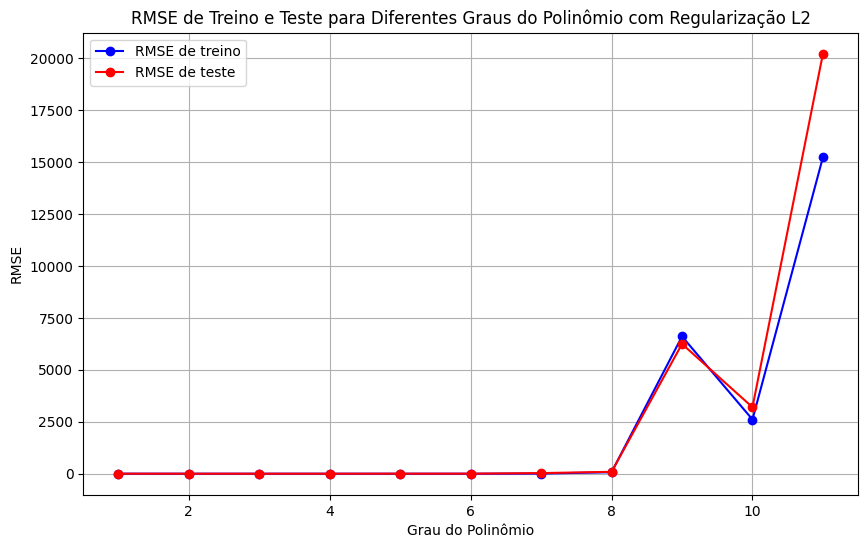

In [8]:

# Função para calcular o RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Inicialização das listas para armazenar RMSE
rmse_train = []
rmse_test = []

# Definir o valor de lambda para regularização L2
lambda_reg = 1e-3  # Fator de regularização L2

# Loop para graus de 1 a 11
for degree in range(1, 12):
    # Gerar os termos polinomiais
    X_poly_train = generate_polynomial_features(X_train, degree)
    X_poly_test = generate_polynomial_features(X_test, degree)
    
    # Regularização L2 para calcular os coeficientes
    I = np.identity(X_poly_train.shape[1])  # Matriz identidade do mesmo tamanho de X_poly.T @ X_poly
    w = np.linalg.inv(X_poly_train.T @ X_poly_train + lambda_reg * I) @ X_poly_train.T @ y_train
    
    # Previsão nos conjuntos de treino e teste
    y_train_pred = X_poly_train @ w
    y_test_pred = X_poly_test @ w
    
    # Calcular o RMSE
    rmse_train.append(rmse(y_train, y_train_pred))
    rmse_test.append(rmse(y_test, y_test_pred))
    
    # Imprimir os resultados para o modelo atual
    print(f"Modelo de grau {degree}:")
    print(f" - RMSE de treino: {rmse_train[-1]:.4f}")
    print(f" - RMSE de teste: {rmse_test[-1]:.4f}")
    print()

# Visualização do RMSE de treino e teste
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), rmse_train, label='RMSE de treino', marker='o', color='blue')
plt.plot(range(1, 12), rmse_test, label='RMSE de teste', marker='o', color='red')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE de Treino e Teste para Diferentes Graus do Polinômio com Regularização L2')
plt.legend()
plt.grid(True)
plt.show()

### (D) Repita os 2 itens anteriores incluindo um termo de regulariza ̧c ̃ao L2 com fator λ = 0.01.

Modelo de grau 1:
 - RMSE de treino: 4.7333
 - RMSE de teste: 4.4842

Modelo de grau 2:
 - RMSE de treino: 3.8523
 - RMSE de teste: 3.5540

Modelo de grau 3:
 - RMSE de treino: 3.7422
 - RMSE de teste: 3.4013

Modelo de grau 4:
 - RMSE de treino: 3.5633
 - RMSE de teste: 3.6034

Modelo de grau 5:
 - RMSE de treino: 3.2760
 - RMSE de teste: 5.0017

Modelo de grau 6:
 - RMSE de treino: 3.0850
 - RMSE de teste: 3.9161

Modelo de grau 7:
 - RMSE de treino: 4.2938
 - RMSE de teste: 7.7279

Modelo de grau 8:
 - RMSE de treino: 18.4613
 - RMSE de teste: 76.6644

Modelo de grau 9:
 - RMSE de treino: 506.1740
 - RMSE de teste: 462.5387

Modelo de grau 10:
 - RMSE de treino: 310.8812
 - RMSE de teste: 436.2552

Modelo de grau 11:
 - RMSE de treino: 5625.7960
 - RMSE de teste: 6438.9007



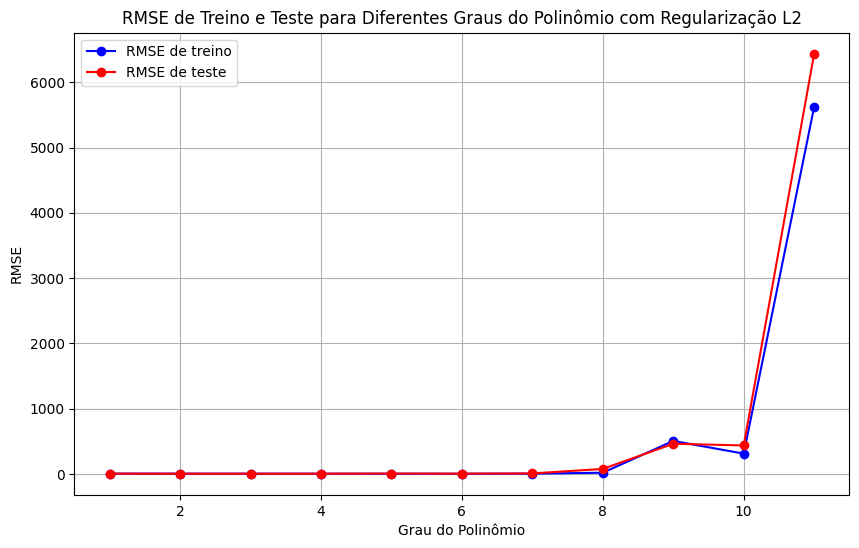

In [9]:
# Função para calcular o RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Inicialização das listas para armazenar RMSE
rmse_train = []
rmse_test = []

# Definir o valor de lambda para regularização L2
lambda_reg = 0.01  # Fator de regularização L2

# Loop para graus de 1 a 11
for degree in range(1, 12):
    # Gerar os termos polinomiais
    X_poly_train = generate_polynomial_features(X_train, degree)
    X_poly_test = generate_polynomial_features(X_test, degree)
    
    # Regularização L2 para calcular os coeficientes
    I = np.identity(X_poly_train.shape[1])  # Matriz identidade do mesmo tamanho de X_poly.T @ X_poly
    w = np.linalg.inv(X_poly_train.T @ X_poly_train + lambda_reg * I) @ X_poly_train.T @ y_train
    
    # Previsão nos conjuntos de treino e teste
    y_train_pred = X_poly_train @ w
    y_test_pred = X_poly_test @ w
    
    # Calcular o RMSE
    rmse_train.append(rmse(y_train, y_train_pred))
    rmse_test.append(rmse(y_test, y_test_pred))
    
    # Imprimir os resultados para o modelo atual
    print(f"Modelo de grau {degree}:")
    print(f" - RMSE de treino: {rmse_train[-1]:.4f}")
    print(f" - RMSE de teste: {rmse_test[-1]:.4f}")
    print()

# Visualização do RMSE de treino e teste
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), rmse_train, label='RMSE de treino', marker='o', color='blue')
plt.plot(range(1, 12), rmse_test, label='RMSE de teste', marker='o', color='red')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE de Treino e Teste para Diferentes Graus do Polinômio com Regularização L2')
plt.legend()
plt.grid(True)
plt.show()

# “(…) se a classe operária tudo produz, a ela tudo pertence”.